「これならわかる機械学習入門」用、熱浴法のコード
- 富谷 昭夫 (著)
- KS物理専門書
- 2021/3/29
- 2023/09/14 更新

In [1]:
Lsize = 24 #(格子サイズ)24*24

In [2]:
# 2d Ising model
import math
import random
import matplotlib.pyplot as plt
import numpy as np
# tqdm はプログレスバーを表示するためのライブラリ(計算度合いを表してくれるおまじないコード、100％は計算終了のこと)
from tqdm. notebook import tqdm

# 周期的境界条件を考慮してサイトの移動を管理
def xup(x):
  x+=1
  if x>=L[0]:
    x-=L[0]
  return x
def yup(y):
  y+=1
  if y>=L[1]:
    y-=L[1]
  return y
def xdn(x):
  x-=1
  if x<0:
    x+=L[0]
  return x
def ydn(y):
  y-=1
  if y<0:
    y+=L[1]
  return y

# ある点 (x,y)の上下左右のスピンを合計する
def spin_sum(sc,x,y):
  h=0
  h+=sc[xup(x)][y]
  h+=sc[xdn(x)][y]
  h+=sc[x][yup(y)]
  h+=sc[x][ydn(y)]
  return h

# ある点 (x,y)の熱浴法を行う,beta：逆温度、hz：外部磁場、sc：スピン配置、h：周囲のスピンと外部磁場の影響を受けた効果的な磁場、p：スピンが+1になる確率、r：乱数
#（サイト (x, y) で熱浴法を適用し、スピンを更新する関数。）
def heatbath_local(beta,hz,sc,x,y):
  h = spin_sum(sc,x,y)-hz
  # このサイトが次に s=+1 となる確率を計算する
  p = math.exp(beta*h)/(math.exp(beta*h) + math.exp(-beta*h))　#この計算式はボルツマン因子に基づいている
  r = random.random()
  # 確率に基づいてランダムにs を決定する
　#それぞれ逆のスピンの向きを入れていく
  if r < p: # success
    sc[x][y]=1
  else:
    sc[x][y]=-1
  return sc

# すべての (x,y)に対して熱浴法を行う(格子全体に対して熱浴法を適用する関数。)
#xlist, ylist:格子のサイトをランダムな順序でアクセスするためにシャッフルされたリスト。
def heatbath(beta,hz,sc):
  xlist = list(range(L[0]) )
  random.shuffle(xlist)
  ylist = list(range(L[1]) )
  random.shuffle(ylist)
  for x in xlist:
    for y in ylist:
      sc = heatbath_local(beta,hz,sc,x,y)
  return sc

# 磁化率を計算する
def magnetization (sc):
  m=0
  for x in range(L[0]):
    for y in range(L[1]):
      m+=sc[x][y]
  return m/(L[0]*L[1])

# モンテカルロ法の初期配位をセットする
def init_conf_cold():#全てのスピンが +1 である初期状態を設定する関数。(絶対零度では全てのスピンの向きが一致するらしい)
  sc = [[1]*L[1] for i in range(L[0])]
  return sc

def init_conf(init="cold"):
  sc = init_conf_cold()
  if init=="cold":
    return sc
  for x in range(L[0]):
    for y in range(L[1]):
      r = random.random()
      if r<0.5:
        sc[x][y]=1
      else:
        sc[x][y]=-1
  return sc


  0%|          | 0/1000 [00:00<?, ?it/s]

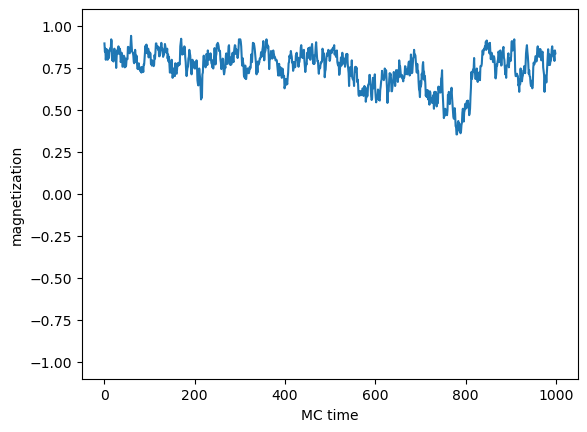

In [3]:
#2次元Isingモデルを用いたシミュレーションを実行し、その磁化の時間発展をプロットするためのものです。
L = [Lsize,Lsize] #格子のサイズを設定するリスト
beta = 0.440687
hz=-0.001
Nsweep = 10**3 #モンテカルロのスイープ回数。ここでは1000回（10^3）です。
#
sc = init_conf()#def init_conf(init="cold")で定義した通り、絶対零度状態に初期位置を設定する
mctime=[];mag_hist=[]　#mctime:モンテカルロ時間（スイープ数）を記録するリスト。mag_hist:各スイープでの磁化を記録するリスト。

for isweep in tqdm(range(Nsweep)):
  sc = heatbath(beta,hz,sc) #各スイープで heatbath(beta, hz, sc) を呼び出し、スピン配置を更新します。
  mag=magnetization(sc) #現在のスピン配置の磁化を計算します。
  mctime.append(isweep) # 計算された磁化とスイープ数をそれぞれ mag_hist と mctime に記録します。
  mag_hist.append(mag)
plt.plot(mctime,mag_hist) #モンテカルロ時間に対する磁化のプロットを作成します。
plt.ylim([-1.1,1.1]) # y軸の範囲を -1.1 から 1.1 に設定します。
plt.xlabel("MC time")
plt.ylabel("magnetization")
plt.show() #プロットを表示します。

In [4]:
#有限温度、ある確率に基づいてスピンの向きをひっくり返す
N_dis=10**2 # 捨てる個数、適当に24*24の全てをひっくり返すのを1回としてそれを100回くり返す
N_trj=10**3+N_dis # トータルのアップデート回数（全部で1000回）
N_sav=10 # アップデート 10回ごとに配位を保存、24*24を1配位として10回に1回保存するから全部で役100枚保存する
prm_list = [
# beta, #of_trj, #of_discard, file_name, save_every
  [0.90, N_trj, N_dis,f"conf/L{Lsize}b090_", N_sav],
  [0.85, N_trj, N_dis,f"conf/L{Lsize}b085_", N_sav],
  [0.80, N_trj, N_dis,f"conf/L{Lsize}b080_", N_sav],
  [0.70, N_trj, N_dis,f"conf/L{Lsize}b070_", N_sav],
  [0.65, N_trj, N_dis,f"conf/L{Lsize}b065_", N_sav],
  [0.60, N_trj, N_dis,f"conf/L{Lsize}b060_", N_sav],
  [0.55, N_trj, N_dis,f"conf/L{Lsize}b055_", N_sav],
  [0.50, N_trj, N_dis,f"conf/L{Lsize}b050_", N_sav],
  [0.47, N_trj, N_dis,f"conf/L{Lsize}b047_", N_sav],
  [0.42, N_trj, N_dis,f"conf/L{Lsize}b042_", N_sav],
  [0.40, N_trj, N_dis,f"conf/L{Lsize}b040_", N_sav],
  [0.35, N_trj, N_dis,f"conf/L{Lsize}b035_", N_sav],
  [0.30, N_trj, N_dis,f"conf/L{Lsize}b030_", N_sav],
  [0.25, N_trj, N_dis,f"conf/L{Lsize}b025_", N_sav],
  [0.20, N_trj, N_dis,f"conf/L{Lsize}b020_", N_sav],
  [0.15, N_trj, N_dis,f"conf/L{Lsize}b015_", N_sav],
  [0.10, N_trj, N_dis,f"conf/L{Lsize}b010_", N_sav],
  [0.05, N_trj, N_dis,f"conf/L{Lsize}b005_", N_sav],
  [0.00, N_trj, N_dis,f"conf/L{Lsize}b000_", N_sav]
  ]

beta=0.9 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.85 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.8 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.7 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.65 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.6 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.55 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.5 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.47 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.42 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.4 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.35 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.3 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.25 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.2 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.15 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.1 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.05 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100

beta=0.0 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

100



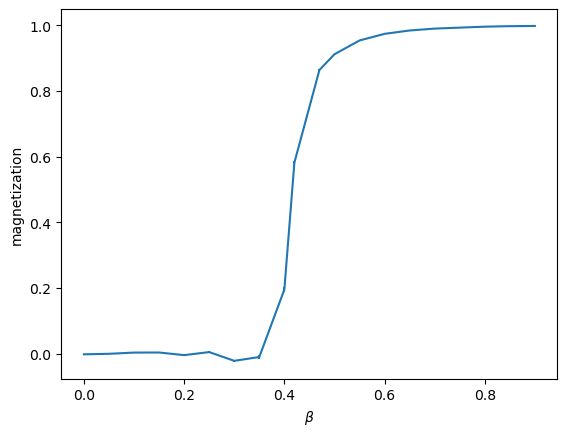

In [5]:
# conf ディレクトリがなければ作る
import os
os.makedirs("conf", exist_ok = True) # conf というディレクトリを作成します。既に存在する場合はエラーを出さずにそのまま進みます。
#
L = [Lsize,Lsize] # 格子サイズの設定
hz = -0.0005 # 相転移を見るために非常に弱い磁場を添加

nprm=len(prm_list) # パラメータリストの長さを調べる
#各ベータに対する磁化とその誤差を保存するリスト。
betas = [] 
mags = []
mags_er = []
#
random.seed(12345)
sc = init_conf() # 初期スピン配置の設定
# 各ベータごとにパラメータを読み出して配位を作る
for ibeta in range(nprm):
#prm_list: 各ベータに対するシミュレーションパラメータのリスト。
#beta: 逆温度。Nsweep:モンテカルロスイープの回数。Ndiscard:初期緩和のために破棄するスイープの数。fname:配位を保存するファイル名のベース。save_every:配位を保存する間隔。
  beta = prm_list[ibeta][0]
  Nsweep = prm_list[ibeta][1]
  Ndiscard = prm_list[ibeta][2]
  fname = prm_list[ibeta][3]
  save_every = prm_list[ibeta][4]
  conf_cnt = 0
#
  print(f"beta={beta} {Nsweep}")
  mag_hist=[]
  # 熱浴法で配位を作る
  for isweep in tqdm(range(Nsweep)):
    sc = heatbath(beta,hz,sc) #熱浴法を用いてスピン配置 sc を更新します。
    mag=magnetization(sc) #現在のスピン配置の磁化を計算します。
    mag_hist.append(mag) # 磁化の履歴を保存
    if (isweep%save_every == 0)&(isweep>=Ndiscard): # スイープ数が save_every の倍数のときに保存します、かつスイープ数が Ndiscard 以上(Ndiscardスイープを破棄し、それ以降のスイープでのみ保存します。)になったらスピン配置を保存します。
      scn = np.array(sc) # スピン配置をNumPy配列に変換
      np.save(f"{fname}{conf_cnt}",scn) #スピン配置をファイルに保存
      conf_cnt+=1
  print(conf_cnt) #保存した配位の数を表示します。今回は100保存しているから100と表示されている
  
  print("") #空行を表示して、出力を見やすくします。
  mag_hist=np.array(mag_hist[Ndiscard:]) #初期の Ndiscard スイープを除いた磁化の履歴をNumPy配列に変換します。
  mag = np.mean(mag_hist) #磁化の平均を計算します。
  mag_er = np.std(mag_hist)/np.sqrt(len(mag_hist)-1) #磁化の標準誤差を計算します。標準誤差は、標準偏差をデータのサンプル数の平方根で割ったものです。
  betas.append(beta) #現在のベータをリストに追加します。
  mags.append(mag) #計算した平均磁化をリストに追加します。
  mags_er.append(mag_er) #計算した標準誤差をリストに追加します。
  #
plt.xlabel(r"$\beta$")
plt.ylabel("magnetization")
plt.errorbar(betas,mags,yerr=mags_er) #ベータに対する磁化とその誤差をエラーバー付きでプロット。
plt.show()
#グラフはベータが温度の逆数だから右が低温、左が高温

# 前処理

In [6]:
nconf = 100 # 各ベータでの配位の数
betacr = 0.440686 # 正方イジング模型の相転移温度,この温度よりも高い（低い）場合に、それぞれの配置がどの相に属するかを決定するために使用される。
#
data = [] #配置データ
labels = [] #ラベルデータ（グループ分けのデータっていうこと）（低温相または高温相のone-hotベクトル）
betas = [] # β値のリスト
nprm=len(prm_list) #prm_listの要素数,今回は19個(リストを数えたよ)
# prm_listからβ値とファイル名を取り出して処理するループ
for ibeta in range(nprm):
  beta = prm_list[ibeta][0] # prm_listからβ値を取得
  fname = prm_list[ibeta][3] # prm_listからファイル名を取得
  for itrj in range(nconf):
    npsc = np.load(f"{fname}{itrj}.npy") # ファイルから配置データをロード
    data.append(npsc)　# 配置データをdataリストに追加
    if beta > betacr:　# β値が相転移温度よりも高いか低いかでラベルを決定
      labels.append([1,0]) # 低温相の one-hot ベクトル
    else:
      labels.append([0,1]) # 高温相の one-hot ベクトル
    betas.append(beta　# β値をbetasリストに追加
# リストをNumPy配列に変換
data = np.array(data)
labels = np.array(labels)
# トレーニングデータとバリデーションデータの分割
train_data=data[0::2]　 # dataの偶数番目の要素をトレーニングデータとする
train_labels=labels[0::2]　# labelsの偶数番目の要素をトレーニングラベルとする,ラベルは正解のこと
train_betas=betas[0::2]　# betasの偶数番目の要素をトレーニング用のβ値とする
#
val_data=data[1::2]　# dataの奇数番目の要素をバリデーションデータとする
val_labels=labels[1::2]　# labelsの奇数番目の要素をバリデーションラベルとする
val_betas=betas[1::2]　# betasの奇数番目の要素をバリデーション用のβ値とする

In [7]:
print("train_data.shape = ", train_data.shape)
print("val_data.shape = ", val_data.shape)
# train_data.shape = (950, 24, 24)　
#950はデータの数。この例では、トレーニングデータまたはバリデーションデータの中に含まれるサンプルの数です。
#データの各サンプルが持つ特徴量の数。これは、例えば画像の場合はピクセルの数や、物理モデルの場合は測定された量の数などです。
#追加の特徴量の数。
# val_data.shape = (950, 24, 24)

train_data.shape =  (950, 24, 24)
val_data.shape =  (950, 24, 24)


In [8]:
import tensorflow as tf　
#TensorFlowは、深層学習モデルを構築し、トレーニングするための強力なライブラリです。ニューラルネットワークやその他の機械学習モデルを容易に定義し、訓練するための豊富なツールセットを提供します。
from tensorflow import keras
print(tf.__version__)

2024-06-13 13:37:25.740058: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1


In [9]:
#TensorFlowを使用して畳み込みニューラルネットワーク（CNN）モデルを定義しています。
#tf.random.set_seed(12345)
#model_FC = keras.Sequential([
#    keras.layers.Flatten(input_shape=(L[0], L[0])), #L[0] × L[0] の入力を1次元にフラット化します。
#    keras.layers.Dense(100, activation='relu'), #100個のユニットを持つ隠れ層で、ReLU活性化関数を使用します。
#    keras.layers.Dense(2, activation='softmax') #2つのクラス（例えば、二値分類の場合）を分類する出力層で、ソフトマックス活性化関数を使用します。
#])

tf.random.set_seed(12345) #TensorFlowのランダムシードを固定しています。これにより、実行ごとに同じ結果が得られるため、再現性を確保できます。
#ここから下4行がニューラルネットワークを定義する部分
model_CNN = keras.Sequential([
keras.layers.Conv2D(filters = 1, kernel_size=(4, 4),activation='relu', input_shape=(Lsize, Lsize, 1)),
#畳み込み層です。1つのフィルタ（カーネル）を使用し、カーネルサイズが4×4です。ReLU活性化関数を使用し、入力の形状は (Lsize, Lsize, 1) です。ここで、Lsize は画像やデータのサイズを示す変数で、1チャネルの画像を想定しています。
keras.layers.Flatten(),keras.layers.Dense(100, activation='relu'),
#畳み込み層の出力を1次元にフラット化します。これにより、後続の全結合層で処理が行えるようになります。
#keras.layers.Dense(100, activation='relu'): 100個のユニットを持つ隠れ層で、ReLU活性化関数を使用します。
keras.layers.Dense(2, activation='softmax') ])
#2つのクラスを分類する出力層で、ソフトマックス活性化関数を使用します。

/Users/shuminoda/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#ニューラルネットワークで実際にトレーニングする部分
#model_FC.compile(optimizer='adam',
model_CNN.compile(optimizer='adam', #最適化アルゴリズムとしてAdamを使用します。Adamは勾配降下法の一種であり、学習率の調整やモーメントを考慮して効率的に学習を進めることができます。
              loss='categorical_crossentropy',  #損失関数としてカテゴリカルクロスエントロピーを指定します。これは、多クラス分類問題で使用される標準的な損失関数であり、真の分布と予測分布との間の差異を測定します。
              metrics=['accuracy']) #モデルの評価指標として精度（Accuracy）を使用します。精度は、正確にクラスを予測できた割合を示す指標であり、多クラス分類問題において一般的に用いられます。

#Optimizer（最適化アルゴリズム）:モデルのパラメータ（重み）を更新する際に使用されるアルゴリズムです。Adamは一般的に扱いやすく、多くの問題において良好な結果を示すことが多いため、デフォルトの選択肢として推奨されます。
#Loss（損失関数）:モデルが出力する予測と、実際のターゲット（正解ラベル）との差異を定量化する関数です。カテゴリカルクロスエントロピーは、確率分布（softmax出力）との差を測定し、学習を最適化する際の目的関数として使用されます。
#Metrics（評価指標）:モデルの性能を評価するための指標です。ここでは精度（Accuracy）を使用しており、トレーニング中にモデルの性能がどのように向上しているかをモニタリングします

In [11]:
#CNNモデル トレーニングの結果の出力
#model_FC.fit(train_data, train_labels, epochs=10,validation_split=0.2)
model_CNN.fit(train_data, train_labels, epochs=10,validation_split=0.2)
#train_data: トレーニングに使用するデータセットです。通常、特徴量のデータを含んでいます。
#train_labels: トレーニングデータに対する正解ラベル（ターゲット）です。多クラス分類の場合、One-hotエンコーディングされたラベルが一般的です。
#epochs=10: トレーニングのエポック数を指定します。1エポックとは、トレーニングデータを一度すべて使用して学習することを意味します。
#validation_split=0.2: トレーニングデータのうち、検証データとして使用する割合を指定します。ここでは、トレーニングデータの20%が検証データとして分割されます。

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6256 - loss: 0.5992 - val_accuracy: 1.0000 - val_loss: 0.0448
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9260 - loss: 0.3926 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9941 - loss: 0.2851 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.1918 - val_accuracy: 1.0000 - val_loss: 7.3619e-04
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.1201 - val_accuracy: 1.0000 - val_loss: 3.1577e-04
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0739 - val_accuracy: 1.0000 - val_loss: 1.9450e-04
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0472 - val_accuracy: 1.0000 - val_loss: 1.4277e-04
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0319 - val_accuracy: 1.

In [3]:
#検証用データセット val_data を使用してモデル model_CNN を評価し、その結果をプロットするためのものです。

#xs、y1s、y2s は、それぞれプロット用の x 軸データと y 軸データを格納するリストです。
xs=[]
y1s=[]
y2s=[]
Ndatamax = 950 #検証用データの総数
Nsameclass = 50 #同じベータにある検証用データの配位の数
for ii in range(0,Ndatamax,Nsameclass):　#0 から Ndatamax までの範囲を Nsameclass ごとにループします。これにより、同じベータに属する検証用データをまとめて取得します。
#  res = model_FC(val_data[ii:ii+Nsameclass])
  res = model_CNN(val_data[ii:ii+Nsameclass]) #指定された範囲の検証用データをモデルに入力し、予測結果 res を取得します。
  x = val_betas[ii]
  #y1 はクラス 0（低温相）の平均確率、y2 はクラス 1（高温相）の平均確率です。
  y1= np.mean(res.numpy().T[0] ) #resの転置行列を取得し、その各列の平均値を計算します。
  y2=np.mean(res.numpy().T[1] ) #resの転置行列を取得し、その各列の平均値を計算します。
  #計算した x（ベータの値）、y1、y2 をそれぞれ xs、y1s、y2s に追加します。
  xs.append( x )
  y1s.append( y1 )
  y2s.append( y2 )
  print(x,y1,y2)
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical") #plt.axvline()を使用して、相転移温度（betacr = 0.440686）を示す破線(Critical)をプロットします。
plt.plot(xs,y1s,label="class:order",marker="o")
plt.plot(xs,y2s,label="class:disorder",marker="o")
plt.legend() #凡例を表示します。四角のラベルが何を表してるかのやつ
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.show()

SyntaxError: invalid non-printable character U+3000 (917102535.py, line 9)